# [**Régularisation de l'amplification de gradient**](https://nbviewer.org/github/Franck-PepperLabs/pepper_dsia_skl_doc_fr/blob/main/docs/examples/1_11_ensembles/plot_gradient_boosting_regularization.ipynb)<br/>([*Gradient Boosting regularization*](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html))

Illustration de l'effet de différentes stratégies de régularisation pour le Gradient Boosting. L'exemple est tiré de Hastie et al 2009 [1].

La fonction de perte utilisée est la déviance binomiale. La régularisation par rétrécissement (`learning_rate < 1.0`) améliore considérablement les performances. En combinaison avec le rétrécissement, l'amplification du gradient stochastique (`subsample < 1.0`) peut produire des modèles plus précis en réduisant la variance via l'ensachage. Le sous-échantillonnage sans retrait donne généralement de mauvais résultats. Une autre stratégie pour réduire la variance consiste à sous-échantillonner les caractéristiques analogues aux fractionnements aléatoires dans les forêts aléatoires (via le paramètre `max_features`).

[1] T. Hastie, R. Tibshirani et J. Friedman, [“**Elements of Statistical Learning Ed. 2**](https://hastie.su.domains/Papers/ESLII.pdf)[”](https://drive.google.com/file/d/1wbK7Ii8bQliX7D3rKyGoR0-gxqJZ11iN/view?usp=share_link), Springer, 2009.

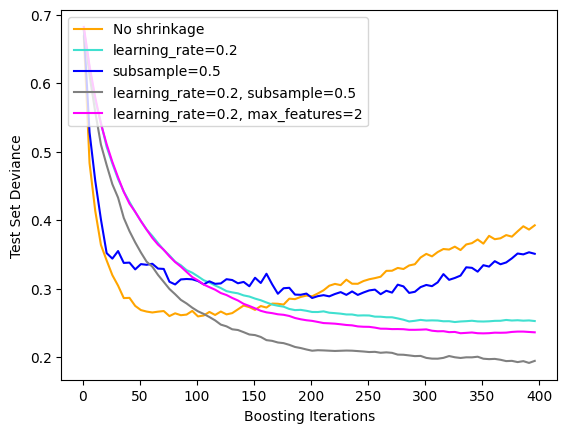

: 

In [3]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X, y = datasets.make_hastie_10_2(n_samples=4000, random_state=1)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = original_params | setting

    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        # Deprecated since version 1.1:
        # Attribute loss_ was deprecated in version 1.1 and will be removed in 1.3.
        # test_deviance[i] = clf.loss_(y_test, y_pred)
        test_deviance[i] = log_loss(y_test, 1 / (1 + np.exp(-y_pred)))

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper left")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()